<a href="https://colab.research.google.com/github/ab2gbl/ECG-detection/blob/main/QRS_detection/LUDB_and_QTDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -r -N -c -np https://physionet.org/files/qtdb/1.0.0/
!wget -r -N -c -np https://physionet.org/files/ludb/1.0.1/
# or
# !cp -r '/content/drive/MyDrive/Final project/dataset/physionet.org' '/content/physionet.org'

In [ ]:
!pip install wfdb

# LUDB

Annotations not found. Proceeding without QRS highlighting.


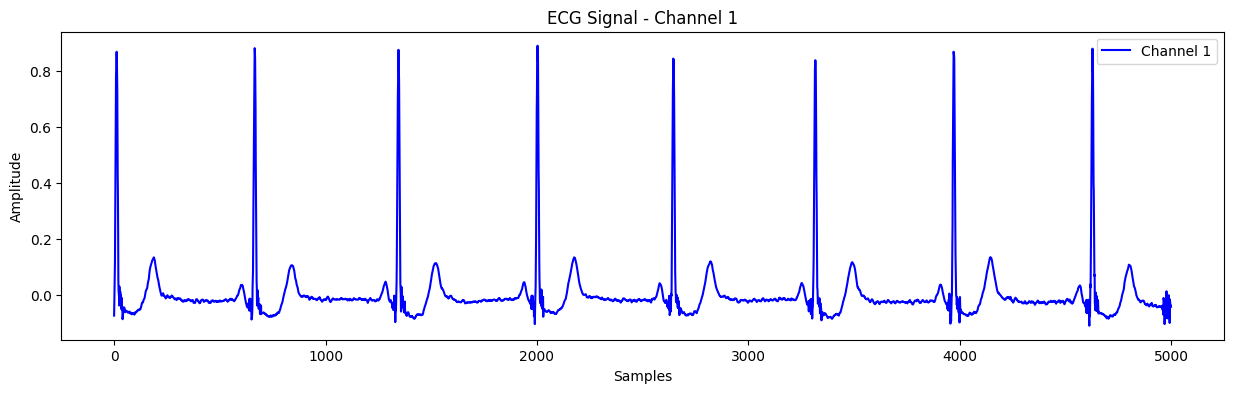

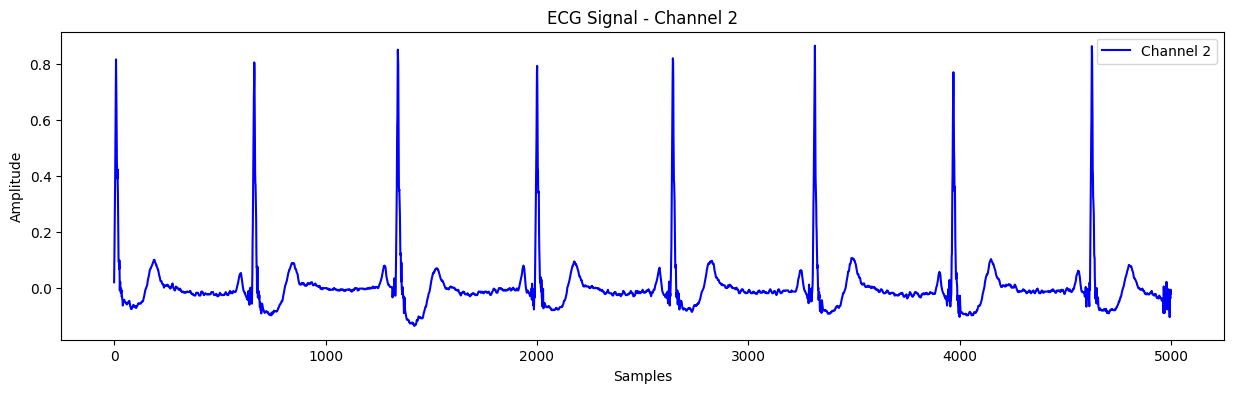

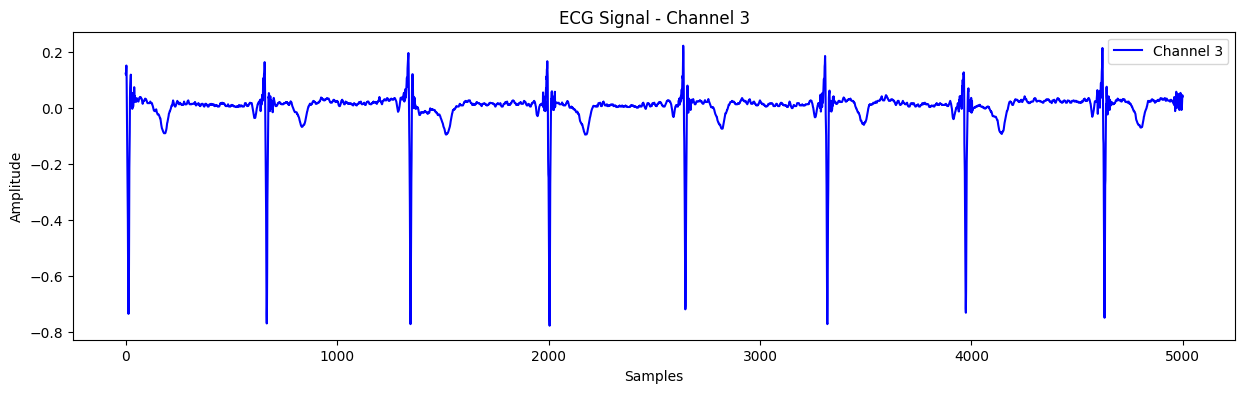

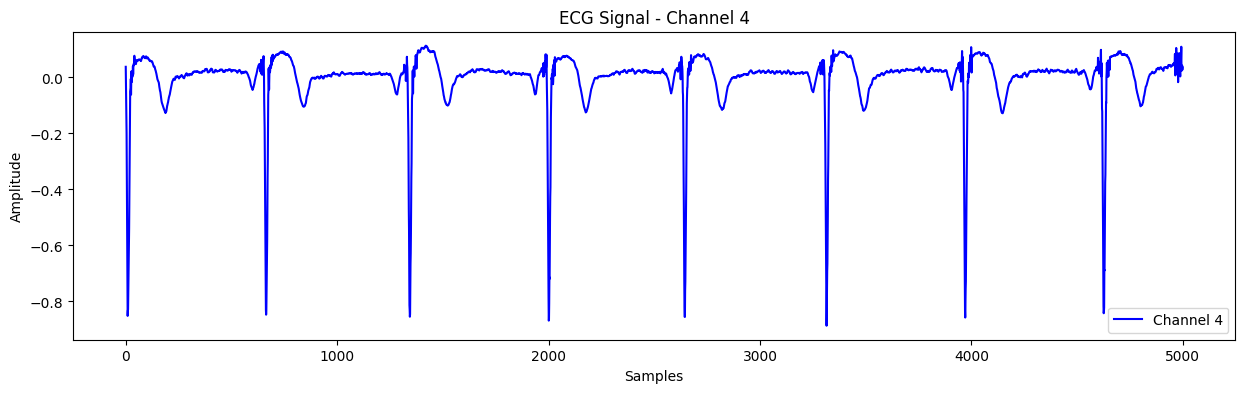

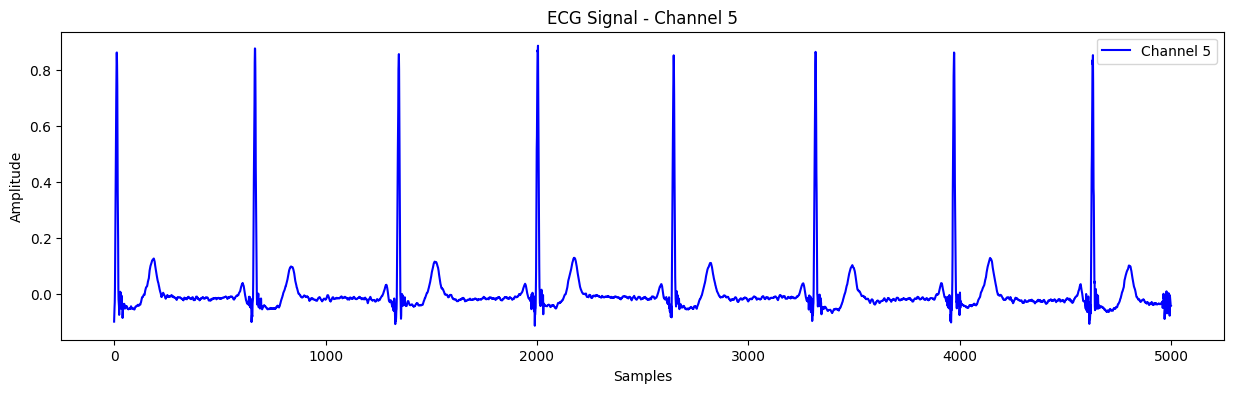

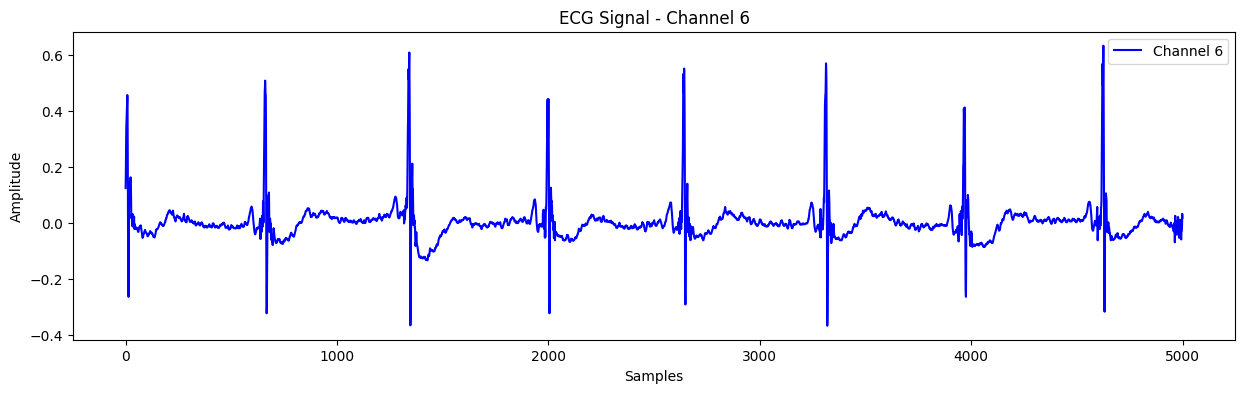

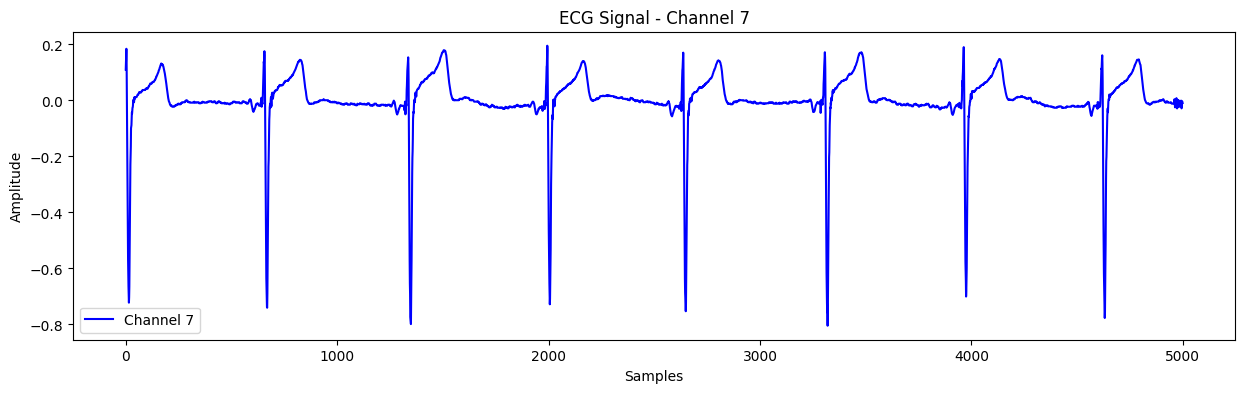

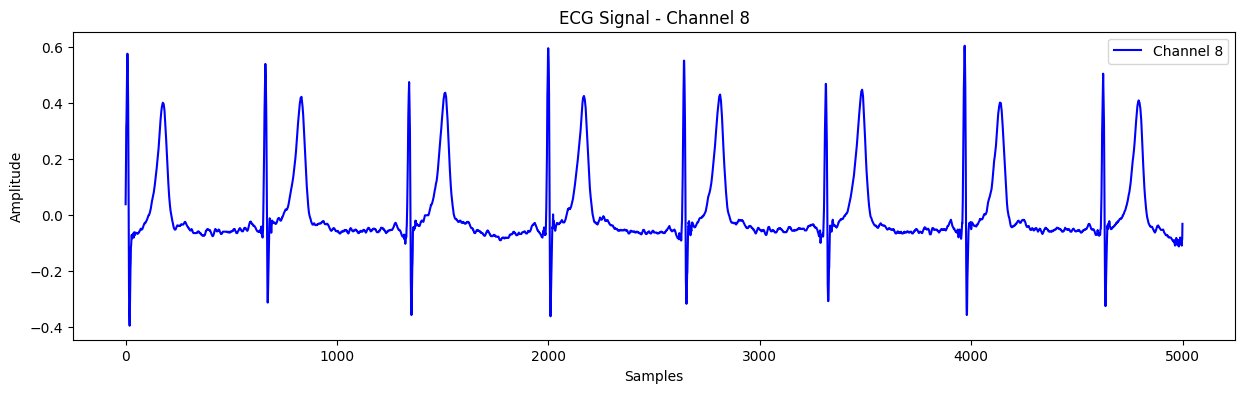

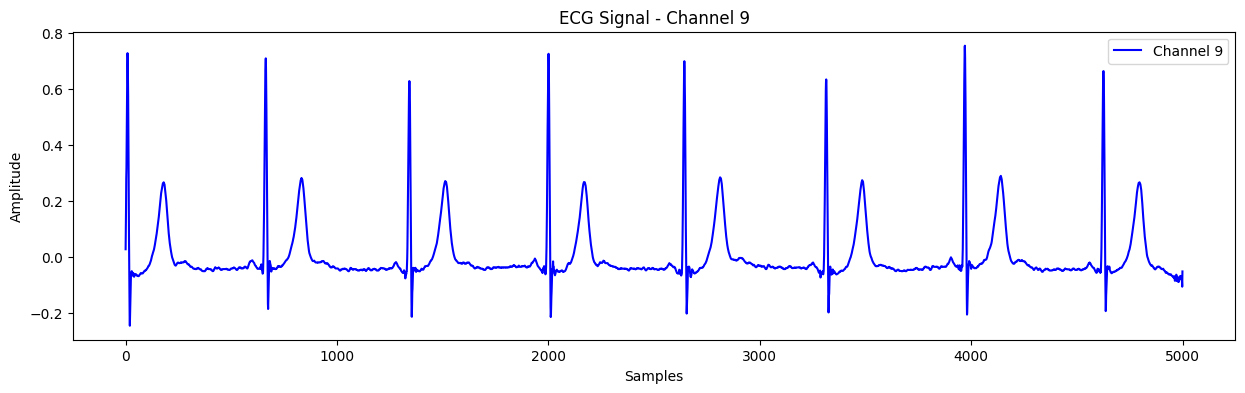

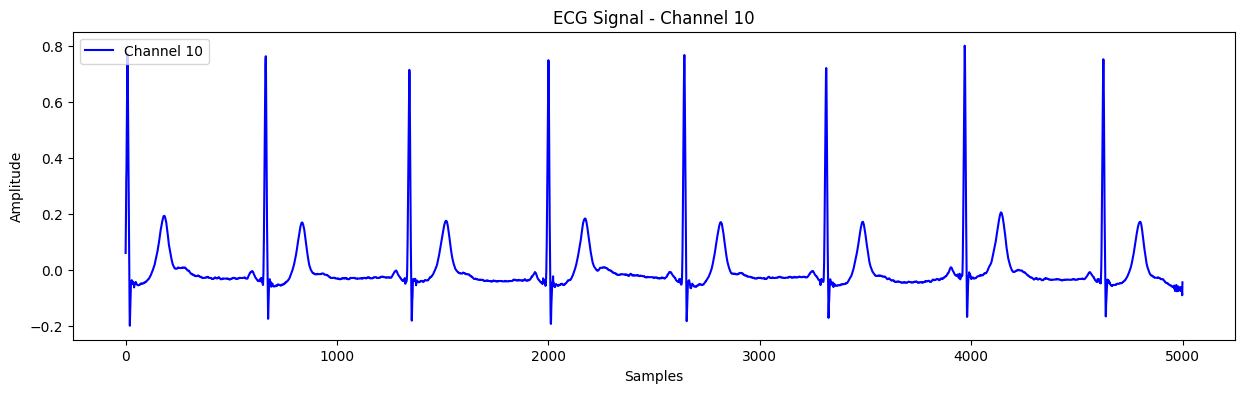

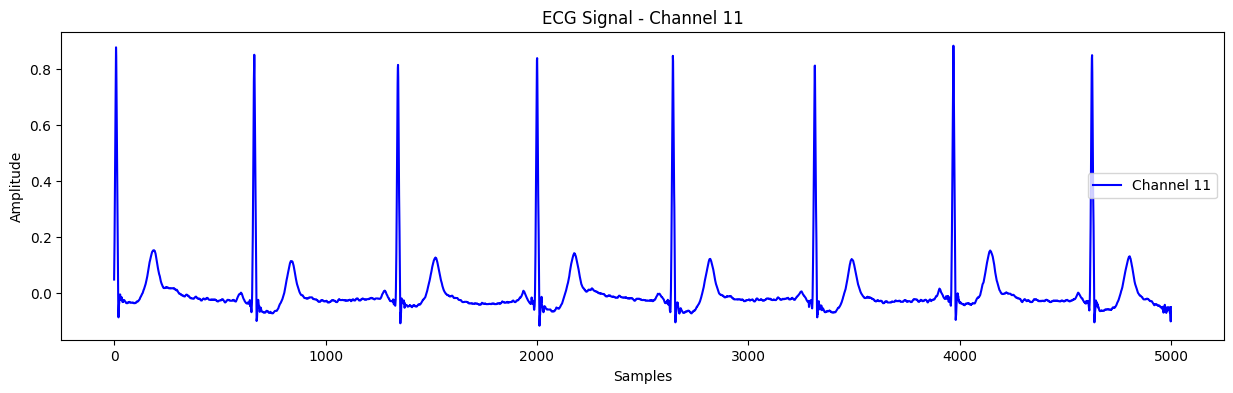

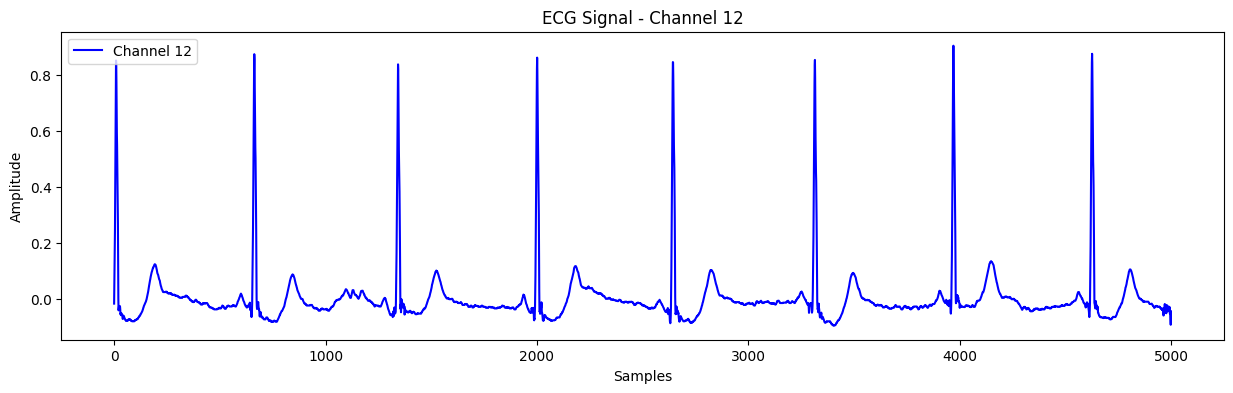

In [13]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Path to the record (adjust the path to your dataset location)
record_name = 'data/001'  # Example record
record_path = '/content/physionet.org/files/ludb/1.0.1/data/1'

# Load the ECG record
record = wfdb.rdrecord(record_path)

# Load annotations (if available)
# For LUDB, annotations might be in a separate file or embedded in the header
# Example: Load annotations using wfdb (if available)
try:
    annotation = wfdb.rdann(record_path, 'atr')  # Adjust the extension if needed
    qrs_samples = annotation.sample  # QRS sample locations
except:
    print("Annotations not found. Proceeding without QRS highlighting.")
    qrs_samples = []

# Extract the signal
signal = record.p_signal  # ECG signal data (12 channels)
fs = record.fs  # Sampling frequency

# Plot each channel separately
for i in range(signal.shape[1]):  # Loop through all 12 channels
    plt.figure(figsize=(15, 4))
    plt.plot(signal[:, i], label=f'Channel {i+1}', color='b')

    # Highlight QRS complexes in red (if annotations are available)
    if len(qrs_samples) > 0:
        for sample in qrs_samples:
            plt.axvline(x=sample, color='r', linestyle='--', alpha=0.5, label='QRS Complex' if sample == qrs_samples[0] else "")

    plt.title(f'ECG Signal - Channel {i+1}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [36]:
import wfdb

# Path to the file (adjust the path to your dataset location)
file_path = '/content/physionet.org/files/ludb/1.0.1/data/1'

# Try to read the file as a record
try:
    record = wfdb.rdrecord(file_path)
    print("Signal data found:")
    print(record.p_signal)  # Print the signal data
except:
    print("No signal data found in the file.")

# Try to read the file as annotations
try:
    annotation = wfdb.rdann(file_path, 'i')
    print("Annotations found:")
    print(annotation.sample)  # Print the annotation samples
    print(annotation.symbol)  # Print the annotation symbols
except:
    print("No annotations found in the file.")

Signal data found:
[[-0.07342657  0.01907131  0.12205045 ...  0.06085455  0.04869817
  -0.01784489]
 [-0.02855478  0.0787728   0.1179821  ...  0.13206733  0.11137898
   0.04529856]
 [ 0.01689977  0.16003317  0.13425549 ...  0.2149331   0.18466731
   0.10363761]
 ...
 [-0.04079254 -0.03648425  0.02196908 ... -0.07941303 -0.08244937
  -0.06932052]
 [-0.03671329 -0.00746269  0.04475183 ... -0.09020285 -0.10077146
  -0.09334248]
 [-0.04195804 -0.0199005   0.03986981 ... -0.04402244 -0.04966249
  -0.04529856]]
Annotations found:
[ 641  664  690  773  840  887 1252 1282 1301 1324 1344 1374 1457 1519
 1567 1911 1938 1961 1980 2002 2028 2118 2176 2219 2538 2581 2604 2624
 2645 2670 2758 2820 2864 3224 3252 3278 3297 3316 3340 3434 3491 3534
 3882 3908 3937 3953 3971 3996]
['(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')',

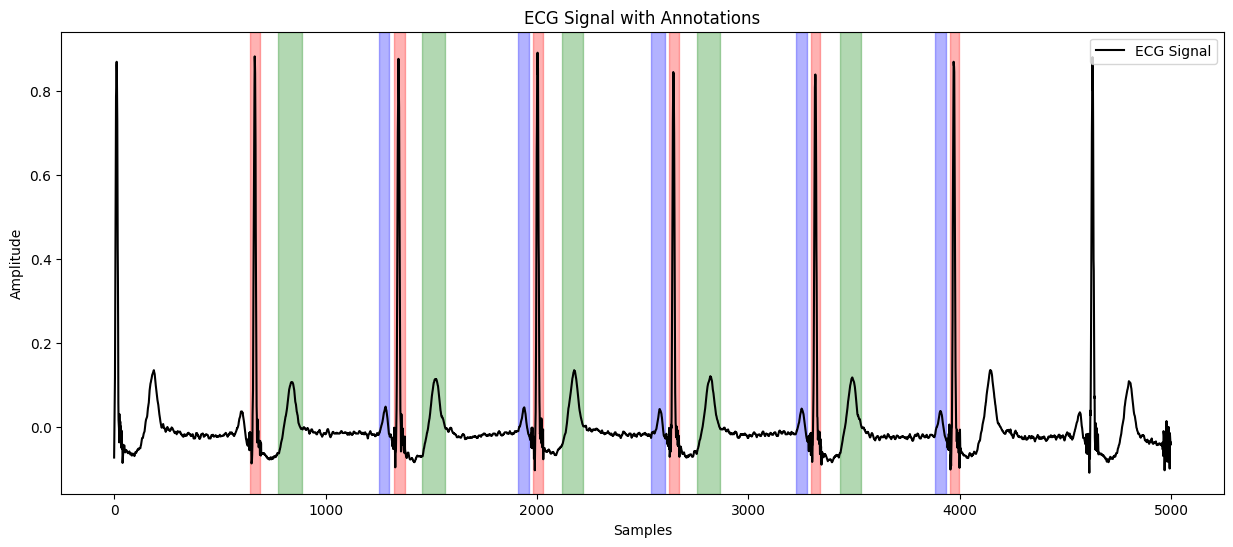

In [96]:
import wfdb
import matplotlib.pyplot as plt

# Path to the file (adjust the path to your dataset location)
file_path = '/content/physionet.org/files/ludb/1.0.1/data/1'

# Load the ECG signal
record = wfdb.rdrecord(file_path)
signal = record.p_signal  # ECG signal data
fs = record.fs  # Sampling frequency

# Load the annotations
annotation = wfdb.rdann(file_path, 'i')
ann_samples = annotation.sample  # Annotation sample locations
ann_symbols = annotation.symbol  # Annotation symbols (e.g., 'N', 'p', 't')

# Plot the ECG signal
plt.figure(figsize=(15, 6))
plt.plot(signal[:, 0], label='ECG Signal', color='black')  # Plot only Channel 1 for simplicity

# Highlight P-waves, QRS complexes, and T-waves
for i in range(len(ann_samples)):
    sample = ann_samples[i]
    symbol = ann_symbols[i]

    # Highlight P-waves in blue
    if symbol == 'p':
        plt.axvspan(ann_samples[i - 1], ann_samples[i + 1], color='blue', alpha=0.3, label='P-wave' if i == 0 else "")

    # Highlight QRS complexes in red
    if symbol == 'N':
        plt.axvspan(ann_samples[i - 1], ann_samples[i + 1], color='red', alpha=0.3, label='QRS Complex' if i == 0 else "")

    # Highlight T-waves in green
    if symbol == 't':
        plt.axvspan(ann_samples[i - 1], ann_samples[i + 1], color='green', alpha=0.3, label='T-wave' if i == 0 else "")

plt.title('ECG Signal with Annotations')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# QTDB

In [97]:
import wfdb

# Path to the file (adjust the path to your dataset location)
file_path = '/content/physionet.org/files/qtdb/1.0.0/sel100'

# Try to read the file as a record
try:
    record = wfdb.rdrecord(file_path)
    print("Signal data found:")
    print(record.p_signal)  # Print the signal data
except:
    print("No signal data found in the file.")

# Try to read the file as annotations
try:
    annotation = wfdb.rdann(file_path, 'pu')
    print("Annotations found:")
    print(annotation.sample)  # Print the annotation samples
    print(annotation.symbol)  # Print the annotation symbols
except:
    print("No annotations found in the file.")

Signal data found:
[[4.725 4.775]
 [4.735 4.745]
 [4.725 4.735]
 ...
 [4.695 5.035]
 [4.68  5.01 ]
 [4.68  5.015]]
Annotations found:
[    83     92    104 ... 224872 224888 224905]
['(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', 't', '(', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', 't', 't', ')', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', 't', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(', '(', 't', 't', ')', ')', '(', '(', 'p', 'p', ')', ')', '(', '(', 'N', 'N', ')', ')', '(

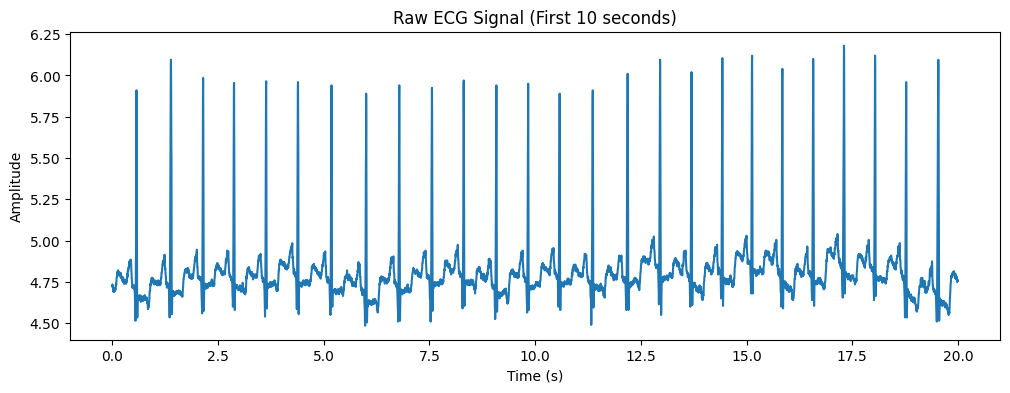

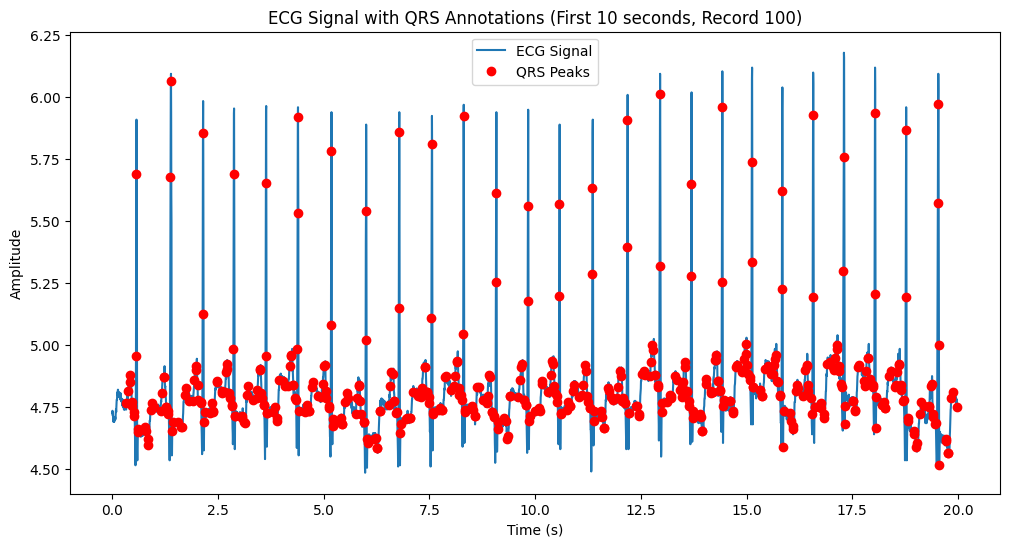

In [95]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Replace '100' with the record number you want to load
record_dir = '/content/physionet.org/files/qtdb/1.0.0/'
record_name = 'sel100'
record_name = record_dir + record_name
record = wfdb.rdrecord(record_name)
annotation = wfdb.rdann(record_name, 'pu')

ann_samples = annotation.sample  # Annotation sample locations
ann_symbols = annotation.symbol  # Annotation symbols (e.g., 'N' for normal QRS)

# Use channel 0 (if multi-channel) and get the sampling frequency (typically 360 Hz)
ecg_signal = record.p_signal[:, 0]
G_fs = record.fs

# Define time axis
time_axis = [i / G_fs for i in range(len(ecg_signal))]

# Plot the first 10 seconds of the raw ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time_axis[:G_fs*20], ecg_signal[:G_fs*20])
plt.title("Raw ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot ECG with QRS annotations (also limited to the first 10s)
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:G_fs*20], ecg_signal[:G_fs*20], label="ECG Signal")

# Filter QRS annotations within the first 10s
qrs_indices_10s = annotation.sample[annotation.sample < G_fs*20]
qrs_values_10s = record.p_signal[qrs_indices_10s, 0]

# Plot QRS peaks
time_axis = np.array(time_axis)  # Convert to NumPy array
plt.plot(time_axis[qrs_indices_10s], qrs_values_10s, 'ro', label='QRS Peaks')



plt.title("ECG Signal with QRS Annotations (First 10 seconds, Record 100)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


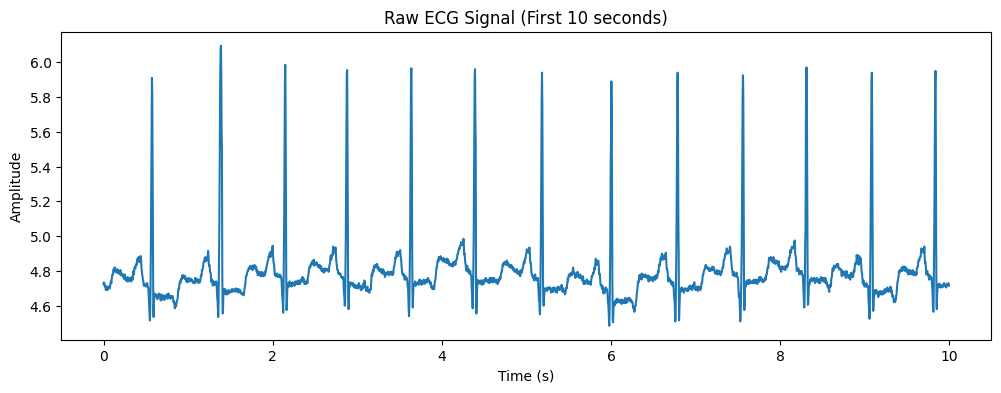

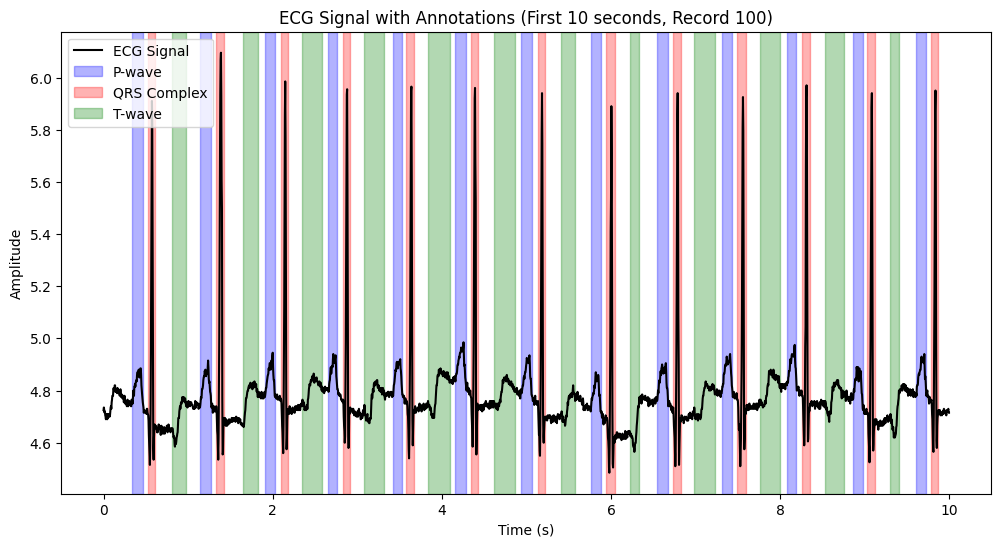

In [85]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Replace '100' with the record number you want to load
record_dir = '/content/physionet.org/files/qtdb/1.0.0/'
record_name = 'sel100'
record_name = record_dir + record_name

# Load the ECG record and annotations
record = wfdb.rdrecord(record_name)
annotation = wfdb.rdann(record_name, 'pu0')

# Extract annotation samples and symbols
ann_samples = annotation.sample  # Annotation sample locations
ann_symbols = annotation.symbol  # Annotation symbols (e.g., 'N', '(', ')', 'p', 't')

# Use channel 0 (if multi-channel) and get the sampling frequency (typically 360 Hz)
ecg_signal = record.p_signal[:, 0]
G_fs = record.fs

# Define time axis
time_axis = [i / G_fs for i in range(len(ecg_signal))]

# Plot the first 10 seconds of the raw ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time_axis[:G_fs*10], ecg_signal[:G_fs*10])
plt.title("Raw ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot ECG with annotations (also limited to the first 10s)
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:G_fs*10], ecg_signal[:G_fs*10], label="ECG Signal", color='black')

# Extract P-wave, QRS, and T-wave segments
p_segments = []
qrs_segments = []
t_segments = []

start_sample = None
current_symbol = None

for sample, symbol in zip(ann_samples, ann_symbols):
    if symbol == '(':  # Start of a segment
        start_sample = sample
    elif symbol == ')':  # End of a segment
        if start_sample is not None:
            if current_symbol == 'p':  # P-wave segment
                p_segments.append((start_sample, sample))
            elif current_symbol == 'N':  # QRS segment
                qrs_segments.append((start_sample, sample))
            elif current_symbol == 't':  # T-wave segment
                t_segments.append((start_sample, sample))
            start_sample = None
            current_symbol = None
    elif symbol in ['p', 'N', 't']:  # Identify the type of segment
        current_symbol = symbol

# Highlight P-wave segments in blue
for start, end in p_segments:
    if start < G_fs * 10 and end < G_fs * 10:  # Only plot segments within the first 10s
        plt.axvspan(time_axis[start], time_axis[end], color='blue', alpha=0.3, label='P-wave' if start == p_segments[0][0] else "")

# Highlight QRS segments in red
for start, end in qrs_segments:
    if start < G_fs * 10 and end < G_fs * 10:  # Only plot segments within the first 10s
        plt.axvspan(time_axis[start], time_axis[end], color='red', alpha=0.3, label='QRS Complex' if start == qrs_segments[0][0] else "")

# Highlight T-wave segments in green
for start, end in t_segments:
    if start < G_fs * 10 and end < G_fs * 10:  # Only plot segments within the first 10s
        plt.axvspan(time_axis[start], time_axis[end], color='green', alpha=0.3, label='T-wave' if start == t_segments[0][0] else "")

plt.title("ECG Signal with Annotations (First 10 seconds, Record 100)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()